# TP 1.2 - Minor Assignments 6 & 7

In [1]:
%matplotlib notebook

<div class="alert alert-danger">
  <b>Minor Assignment 6/13:</b> <br/>  
Pre-prune a tree graphicaly by ploting the training and testing accuracies on the same plot according to different complexity parameters and choosing the right one.
</div>

<IPython.core.display.Javascript object>


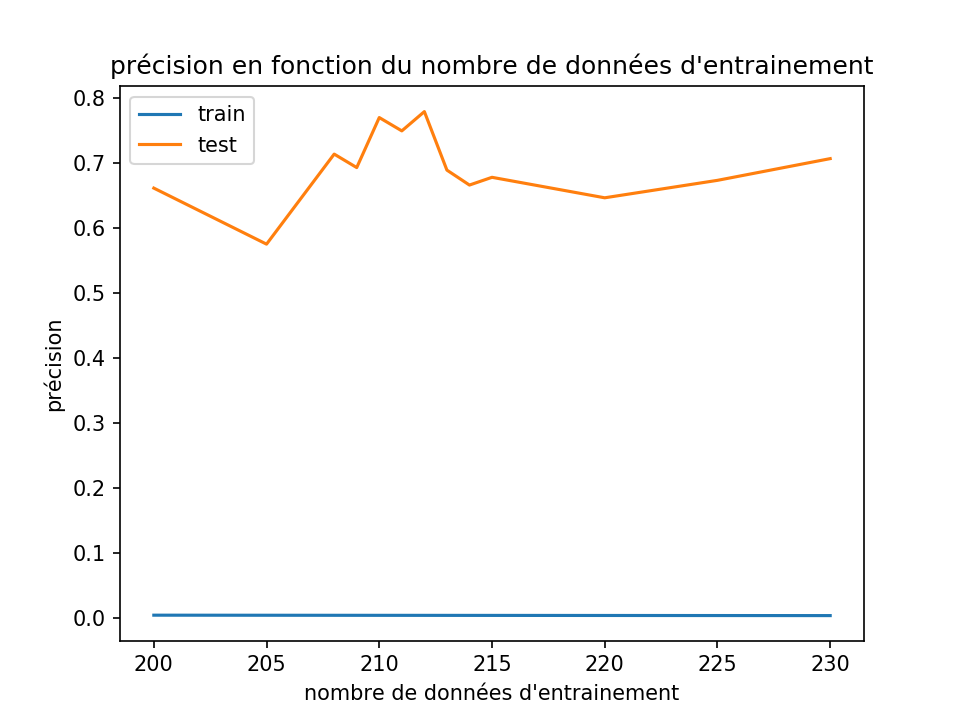

In [2]:
# ESTHER JAMET & ALEXIS CARBILLET
# Assignment 6

# import des bibliothèques
from sklearn import tree
import pandas
import matplotlib.pyplot as plt

# on importe les données
dataframe = pandas.read_csv('gobelins.csv')
atts = dataframe.drop(['id', 'type'], axis=1)
atts = pandas.get_dummies(atts)  # numérise les variables qualitatives
labels = dataframe['type']
n = [200, 205, 208, 209, 210, 211, 212, 213, 214, 215, 220, 225, 230]  # nombre de données d'entrainement
score_test = []
score_train = []

# on sépare les données en 2 parties: une d'entrainement et une de test pour chaque n
for i in n:
    train_att = atts.iloc[:i]
    train_labels = labels.iloc[:i]

    test_att = atts.iloc[i:271]
    test_labels = labels.iloc[i:271]

    clf = tree.DecisionTreeClassifier()  # on crée notre arbre
    clf = clf.fit(train_att, train_labels)  # on l'entraine

    # on calcule son score
    score_train.append(clf.score(train_att, train_labels) / len(train_labels))
    predictions = clf.predict(test_att)
    acc = sum(test_labels == predictions) / len(test_labels)
    score_test.append(acc)

# on affiche les score en fonction du nombre de données utilisées en entrainement
plt.plot(n, score_train, label='train')
plt.plot(n, score_test, label='test')
plt.title("précision en fonction du nombre de données d'entrainement")
plt.xlabel("nombre de données d'entrainement")
plt.ylabel("précision")
plt.legend()
plt.show()


On choisit un nombre de données d'entrainement de 212 (soit 78,5% du nombre de données), nombre pour lequel la précision du jeu de test est maximale.

<div class="alert alert-danger">
  <b>Minor Assignment 7/13:</b> <br/>  
Run a cross-validation procedure on the gobelins dataset repeated many times comparing decision trees and several random forests (with different number of trees) and boxplot the results.
</div>

<IPython.core.display.Javascript object>


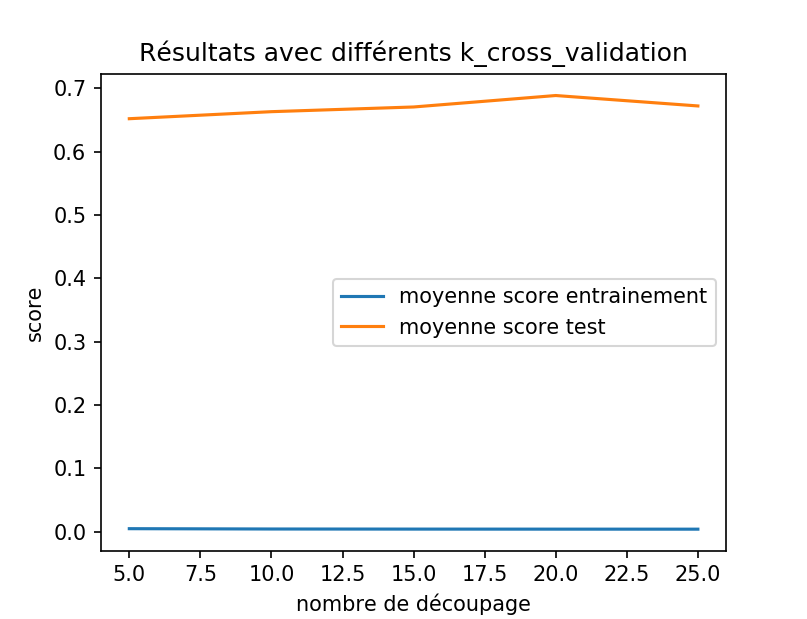

<IPython.core.display.Javascript object>


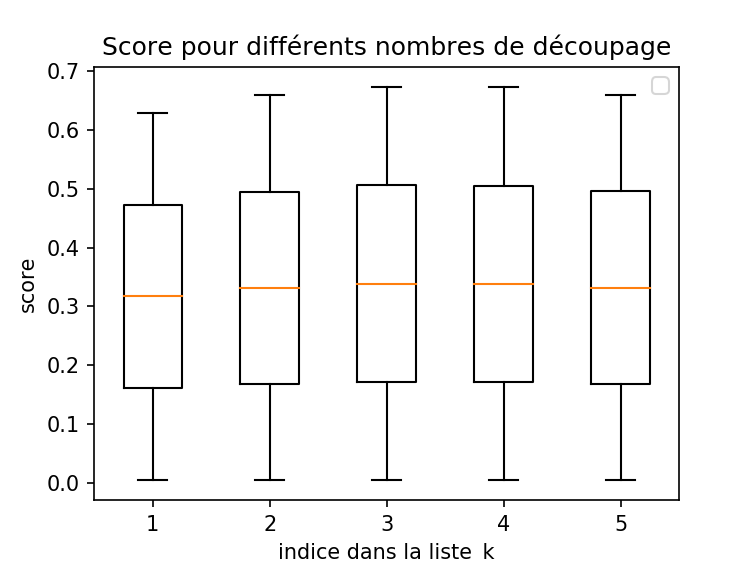

No handles with labels found to put in legend.


In [3]:
# ESTHER JAMET & ALEXIS CARBILLET
# Assignment 7

# import des bibliothèques
import pandas
from sklearn import tree
import graphviz
import numpy as np
import matplotlib.pyplot as plt

# on importe les données
dataframe = pandas.read_csv('gobelins.csv')
atts = dataframe.drop(['id', 'type'], axis=1)
atts = pandas.get_dummies(atts)  # numériser les variables qualitatives
labels = dataframe['type']


# renvoie les scores d'entrainement et de test moyens
def moyenne_k_cross_validation(k, score_train, score_test):  # moyenne des coefs
    return (score_train / k, score_test / k)


# définit la validation croisée pour un nombre de découpage donné
def k_cross_validation(k, data, target):  # k le nombre de sous intervalles
    nb_sous_intervalle = int(np.floor(len(data) / k))
    x = range(len(data) - nb_sous_intervalle)  # on enlève le nombre de données de test
    somme_train_score = 0
    somme_test_score = 0
    
    for i in range(k):
        A = atts.iloc[:i * nb_sous_intervalle, :]  # haut matrice inputs train
        B = atts.iloc[(i + 1) * nb_sous_intervalle:, :]  # bas matrice inputs train
        X_train = np.concatenate((A, B), axis=0)  # on forme une matrice globale
        X_test = atts.iloc[i * nb_sous_intervalle:(i + 1) * nb_sous_intervalle, :]
        C = labels.iloc[:i * nb_sous_intervalle]  # haut matrice outputs train
        D = labels.iloc[(i + 1) * nb_sous_intervalle:]  # bas matrice outputs train
        y_train = np.concatenate((C, D))  # on forme une matrice globale
        y_test = labels.iloc[i * nb_sous_intervalle:(i + 1) * nb_sous_intervalle]
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(X_train, y_train)  # inputs et outputs
        predictions = clf.predict(X_test)
        acc = sum(y_test == predictions) / len(y_test)
        somme_train_score += (clf.score(X_train, y_train) / len(y_train))  # on somme les scores d'entrainement
        somme_test_score += acc  # on somme les scores de test
        
    m = moyenne_k_cross_validation(k, somme_train_score, somme_test_score)  # moyenne des scores
    return m


def liste_k_cross_validation(liste_k, data, target):  # pour une liste de K
    liste_score_train = []
    liste_score_test = []
    box = []
    mini = np.min(liste_k)  # le plus petit découpage aura le plus grand nombre de données test
    nb_sous_intervalle = int(np.floor(len(data) / mini))
    
    for i in liste_k:  # on fait la validaton croisée pour un nombre d'intervalle i
        liste_score_train.append(k_cross_validation(i, data, target)[0])
        liste_score_test.append(k_cross_validation(i, data, target)[1])
        box.append(k_cross_validation(i, data, target))
    
    # affichage
    fig = plt.figure(1, figsize=(4, 3))
    plt.plot(liste_k, liste_score_train, label='moyenne score entrainement')
    plt.plot(liste_k, liste_score_test, label='moyenne score test')
    plt.title('Résultats avec différents k_cross_validation')
    plt.xlabel("nombre de découpage")
    plt.ylabel('score')
    plt.legend()
    
    fig = plt.figure(2, figsize=(4, 3))
    box = np.transpose(np.array(box))
    plt.boxplot(box)
    plt.title('Score pour différents nombres de découpage')
    plt.xlabel("indice dans la liste_k")
    plt.ylabel('score')
    plt.legend()
    plt.show()


liste_k_cross_validation([5, 10, 15, 20, 25], atts, labels)
